[  0.     0.     0.     0.     0.     1.     2.     3.     4.     5.     6.
   7.     8.     9.    10.    11.    13.    15.    17.    18.    19.    20.
  15.    14.    12.    10.     7.     4.     3.     2.     1.     0.     0.
   0.     0.     0.    -1.    -2.    -3.    -4.    -5.    -6.    -7.    -8.
  -9.   -10.   -12.   -15.   -17.   -18.   -19.   -20.   -16.   -13.   -10.
  -8.    -4.    -3.    -2.     0.     0.     0.     0.     0.     0.     1.
   2.     3.     4.     5.     6.     7.     8.     9.    10.    11.    12.
  13.    14.    15.    16.    17.    18.    19.    20.    17.    15.    13.
  12.    10.     7.     3.     2.     0.     0.     0.     0.     0.     0.
  -1.    -2.    -3.    -4.    -5.    -6.    -7.    -8.    -9.   -10.   -11.
 -12.   -13.   -14.   -15.   -16.   -17.   -18.   -19.   -20.   -17.   -14.
 -13.   -10.    -7.    -4.    -3.    -2.    -1.     0.     0.     0.     0.
   1.     3.     5.     7.     9.    11.    13.    15.    17.    19.    15.
  13.    11.

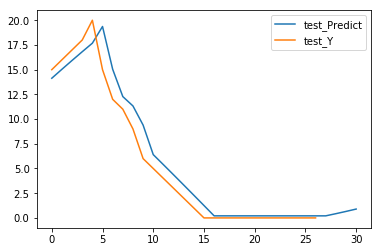

In [25]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

 
look_back = 1
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)
 
# file loader
sydtpath = "."
naturalEndoTekCode = "A168330"
fullpath = sydtpath + os.path.sep + naturalEndoTekCode + '.csv'
pandf = pd.read_csv(fullpath, index_col="Date2")
 
# convert nparray
nparr = pandf['data_x3'].values[::-1]
nparr.astype('float32')
'''
nparr = np.append(nparr, 4)
nparr = np.append(nparr, 2)
nparr = np.append(nparr, 1)
nparr = np.append(nparr, 1)
nparr = np.append(nparr, 0)
nparr = np.append(nparr, 0)
nparr = np.append(nparr, 0)
nparr = np.append(nparr, 0)
nparr = np.append(nparr, 0)
nparr = np.append(nparr, 0)
nparr = np.append(nparr, 0)
nparr = np.append(nparr, 0)
nparr = np.append(nparr, 0)
nparr = np.append(nparr, 0)
nparr = np.append(nparr, 0)
nparr = np.append(nparr, 0)
'''
print(nparr)  # 이렇게 불러와서 똑같이 작업하면 될듯 함. 
print(nparr[-1])
test = np.reshape(nparr, (len(nparr),1))

# normalizations
scaler = MinMaxScaler(feature_range=(0, 1))
nptf = scaler.fit_transform(test)
#print(nptf)

print('-------------------------------- 데이터 정규화 끝')
 
# split train, test
train_size = int(len(nptf) * 0.9)
test_size = len(nptf) - train_size
train, test = nptf[0:train_size], nptf[train_size:len(nptf)]
print(len(train), len(test))


print('-------------------------------- train, test 나누기')

# create dataset for learning
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
 
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print(trainX.shape)
print(testX.shape)
#print(testX)

print('-------------------------------- train, test 정리')
'''
# simple lstm network learning
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
'''
# model save

from keras.models import load_model

#model.save('my_model.h5')
model = load_model('my_model.h5')

# make prediction
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict) # 되돌림
testY = scaler.inverse_transform(testY) # 되돌림
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Train Score: %.2f RMSE' % testScore)

# predict last value (or tomorrow?)
lastX = nptf[-1]
lastX = np.reshape(lastX, (1, 1, 1))


# lastX 를 넣으면된다. 데이터 예측 할때 

print(lastX)

lastY = model.predict(lastX)
lastY2 = np.reshape(lastY, (1, 1, 1))

lastY2 = model.predict(lastY2)
lastY3 = np.reshape(lastY2, (1, 1, 1))

lastY3 = model.predict(lastY3)
lastY4 = np.reshape(lastY3, (1, 1, 1))

lastY4 = model.predict(lastY4)
lastY5 = np.reshape(lastY4, (1, 1, 1))

lastY5 = model.predict(lastY5)

lastY = scaler.inverse_transform(lastY)
lastY2 = scaler.inverse_transform(lastY2)
lastY3 = scaler.inverse_transform(lastY3)
lastY4 = scaler.inverse_transform(lastY4)
#lastY5 = scaler.inverse_transform(lastY5)

print('Predict first: %d' % lastY)  
print('Predict second: %d' % lastY2)  
print('Predict third: %d' % lastY3)  
print('Predict fourth: %d' % lastY4)  
#print('Predict the Close value of final day: %d' % lastY5)  

predict_Y = np.array([lastY,lastY2,lastY3,lastY4])
predict_Y = predict_Y.reshape(len(predict_Y), 1)

testPredict = np.concatenate((testPredict,predict_Y), axis=0)

# plot
plt.plot(testPredict, label='test_Predict') 
plt.plot(testY, label='test_Y') 

plt.legend()
plt.show()